#  Exploratory Data analysis on Red Wine Dataset 

The project is aimed at looking and finding deep insights of the white wine dataset. The report also aims in bringing us to a conclusion so as to what are the factors that affect the quality of wine.

The data used is based on the wine quality dataset as recommended by Udacity. The features of the dataset are as follows , This dataset has 13 variables which contains 9 variables of ingredient, 2 variables of physical properity, 1 variable of quantity and 1 of quality. The dataset are of the size 4989 , 13. The libraries used for the data are , tidyverse and GGally. The libraries are used for visualization which can help us to come to conclusion.

In [35]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Data description 

The data is in csv format.In computing, a comma-separated values (CSV) file stores tabular data (numbers and text) in plain text. Each line of the file is a data record. Each record consists of one or more fields, separated by commas.

All wines are produced in a particular area of Portugal. Data are collected on 12 different properties of the wines one of which is Quality, based on sensory data, and the rest are on chemical properties of the wines including density, acidity, alcohol content etc. All chemical properties of wines are continuous variables. Quality is an ordinal variable with possible ranking from 1 (worst) to 10 (best). Each variety of wine is tasted by three independent tasters and the final rank assigned is the median rank given by the tasters.

## Attribute Information:

For more information, read [Cortez et al., 2009]. Input variables (based on physicochemical tests):
1. fixed acidity
2. volatile acidity
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol Output variable (based on sensory data): 
12. quality (score between 0 and 10) 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

![Wine](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3c/Red_and_white_wine_12-2015.jpg/1200px-Red_and_white_wine_12-2015.jpg)

Let's view our imported data in dataframe format. For this we use the head function to view the 5 rows.

In [5]:
df = pd.read_csv('wineQualityReds.csv')
df.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
#df.pop('Unnamed: 0')

In [14]:
df.shape

(1599, 12)

In [15]:
df.size

19188

In [16]:
df.describe(include = 'all')

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [18]:
print("Null Check :")
df.isnull().sum()

Null Check :


fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Univariate Analysis  

Uni means one. Univariate means one variable analysis. The key pointers to the Univaraite analysis are to find out the outliers present in the data. We also tend to find the dsitribution of the data on the dataset which can further help us for the Bivaraite/Multivariate analysis. 


### Quality - Count plot 

Here's the Quality count plot. 

We can notice the following trend , 

1. The Quality rating 5 and 6 are high in number. 
2. We can see few wines which are rated as 7 and 8 , But are nowhere near the count of 5 and 6. Hence we can assume that most of the wines which was rated were mediocre and there is a possibility that the wine tasters were not given good quality wines. 

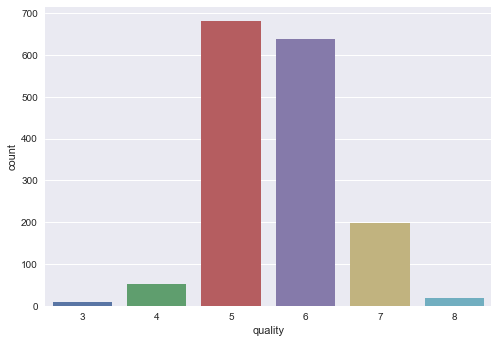

In [19]:
sns.countplot(x = 'quality', data = df) 

### pH - Count plot 

From the below plot , we can see that. 
1. it follows a normal distribution. 
2. There is a shape of bell curve which can be observed. 
3. It's continuous. 
4. There are few points which seem to be minor outliers

(array([   1.,    0.,    1.,    8.,   12.,    7.,   25.,   39.,   70.,
         104.,  121.,  136.,  202.,  178.,  175.,  167.,   99.,   86.,
          66.,   39.,   27.,   10.,   14.,    5.,    2.,    0.,    1.,
           2.,    0.,    2.]),
 array([ 2.74      ,  2.78233333,  2.82466667,  2.867     ,  2.90933333,
         2.95166667,  2.994     ,  3.03633333,  3.07866667,  3.121     ,
         3.16333333,  3.20566667,  3.248     ,  3.29033333,  3.33266667,
         3.375     ,  3.41733333,  3.45966667,  3.502     ,  3.54433333,
         3.58666667,  3.629     ,  3.67133333,  3.71366667,  3.756     ,
         3.79833333,  3.84066667,  3.883     ,  3.92533333,  3.96766667,
         4.01      ]),
 <a list of 30 Patch objects>)

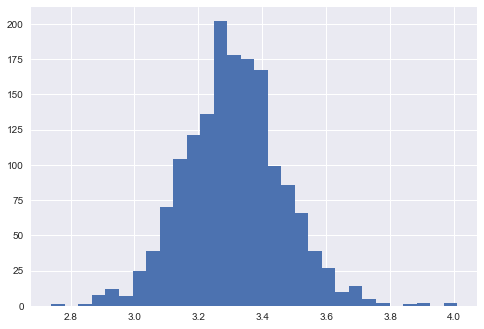

In [21]:
plt.hist(x = 'pH' , data = df , bins= 30 )

### Chloride - Count plot 

From the Chloride Count plots , We can see the following the trend. 

1. There are large number of Outliers. 
2. They are continuous in nature. 
3. The distribution is skewed 
4. Chloride value are less for most of the wines. 
5. Maximum number of Wine Bottles are observed to have chloride levels of less than 0.1 g/dm^3 

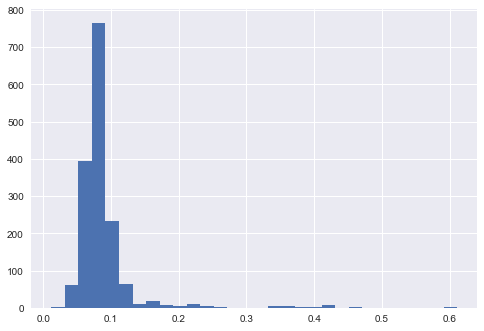

In [29]:
plt.hist(x = 'chlorides' , data = df , bins = 30) 
plt.show()

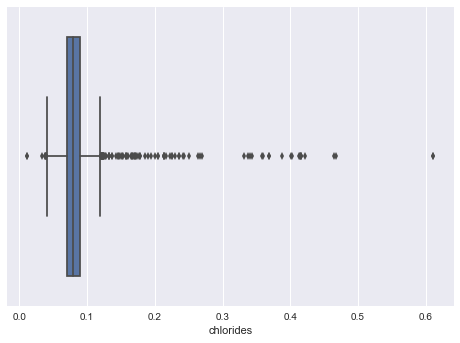

In [28]:
sns.boxplot(df['chlorides'])

## Alcohol - Count plot.  

So we plotted the Alcohol - Count plot in order to catch the major outliers. We also want to see whether there is a trend in the amount of Alcohol. Here are our key findings , 

1. We can observe skewness for the following column. 
2. Most of the wine bottles are observed to have alcohol content between 9% to 10%. 
3. We can notice that Alcohol (% by Volume) are on the ranges 8.4 to 14.9 % By volume. 

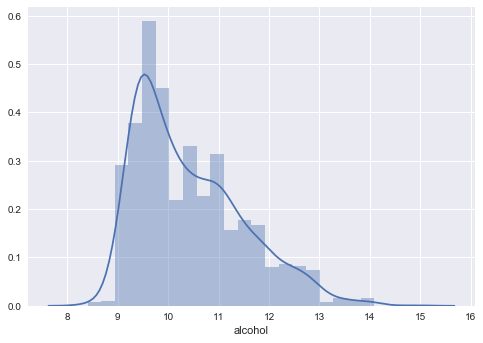

In [31]:
sns.distplot(df['alcohol'])

## Residual Sugar -  Count plot 

Residual Sugar plots are as follows. Here's what we found from Residual Sugar. 

1. We can see that the distribution is skewed towards right. 
2. There are outliers present in the data. We can check the boxplot for the same. 

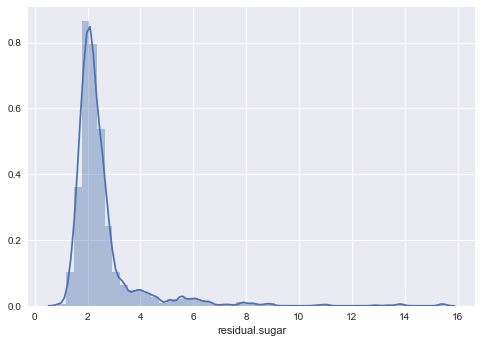

In [33]:
sns.distplot(df['residual.sugar'])

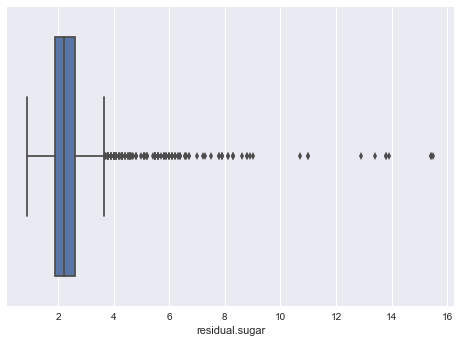

In [34]:
sns.boxplot(df['residual.sugar'])